In [6]:
from google.colab import files
uploaded = files.upload()

Saving breach_report.csv to breach_report.csv


In [9]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded ['breach_report.csv']))
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,University of Utah,UT,Healthcare Provider,10000,7/20/2020,Hacking/IT Incident,Email,No,NaN
1,NCP Healthcare Management Company,MA,Business Associate,78070,7/17/2020,Hacking/IT Incident,Email,Yes,NaN
2,Maryland Health Enterprises DBA Lorien Health ...,MD,Healthcare Provider,47754,7/17/2020,Hacking/IT Incident,Network Server,No,NaN
3,"Heartland Counseling Services, Inc.",NE,Healthcare Provider,500,7/16/2020,Unauthorized Access/Disclosure,Email,No,NaN
4,Wisconsin Department of Corrections,WI,Healthcare Provider,1853,7/15/2020,Unauthorized Access/Disclosure,Other,No,NaN
...,...,...,...,...,...,...,...,...,...
563,"Chapman & Chapman, Inc.",OH,Business Associate,2032,8/17/2018,Hacking/IT Incident,Email,Yes,NaN
564,"AU Medical Center, INC",GA,Healthcare Provider,417000,8/16/2018,Hacking/IT Incident,Email,No,NaN
565,"CoreLink Administrative Solutions, LLC",ND,Business Associate,1813,8/6/2018,Hacking/IT Incident,Email,Yes,NaN
566,"CoreSource, Inc.",IL,Business Associate,769,8/3/2018,Unauthorized Access/Disclosure,Other,Yes,NaN


In [10]:
#display Independent variable
df_independent = df[['Name of Covered Entity','State','Covered Entity Type','Breach Submission Date','Type of Breach','Location of Breached Information','Business Associate Present']]
df_independent 

,Name of Covered Entity,State,Covered Entity Type,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,University of Utah,UT,Healthcare Provider,7/20/2020,Hacking/IT Incident,Email,No
1,NCP Healthcare Management Company,MA,Business Associate,7/17/2020,Hacking/IT Incident,Email,Yes
2,Maryland Health Enterprises DBA Lorien Health ...,MD,Healthcare Provider,7/17/2020,Hacking/IT Incident,Network Server,No
3,"Heartland Counseling Services, Inc.",NE,Healthcare Provider,7/16/2020,Unauthorized Access/Disclosure,Email,No
4,Wisconsin Department of Corrections,WI,Healthcare Provider,7/15/2020,Unauthorized Access/Disclosure,Other,No
...,...,...,...,...,...,...,...
563,"Chapman & Chapman, Inc.",OH,Business Associate,8/17/2018,Hacking/IT Incident,Email,Yes
564,"AU Medical Center, INC",GA,Healthcare Provider,8/16/2018,Hacking/IT Incident,Email,No
565,"CoreLink Administrative Solutions, LLC",ND,Business Associate,8/6/2018,Hacking/IT Incident,Email,Yes
566,"CoreSource, Inc.",IL,Business Associate,8/3/2018,Unauthorized Access/Disclosure,Other,Yes


In [11]:
#display Dependent variable
df_dependent = df[['Individuals Affected']]
df_dependent

,Individuals Affected
0,10000
1,78070
2,47754
3,500
4,1853
...,...
563,2032
564,417000
565,1813
566,769


In [12]:
#Check for missing data 
df.isna().any().any()

True

In [ ]:
#identify where the missing data is
df.loc[:,df.isnull().any()].columns

Index(['State', 'Web Description'], dtype='object')

In [13]:
#See data missing
df[df['State'].isna()]

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
366,Intramural Practice Plan - Medical Sciences Ca...,NaN,Healthcare Provider,439753,9/16/2019,Hacking/IT Incident,Network Server,No,NaN
447,Farmacia La Amistad Inc.,NaN,Healthcare Provider,2500,5/24/2019,Hacking/IT Incident,Network Server,No,NaN
459,"Inmediata Health Group, Corp.",NaN,Healthcare Clearing House,1565338,5/7/2019,Unauthorized Access/Disclosure,Network Server,No,NaN
475,"Metro Santurce, Inc. d/b/a Hospital Pavia Sant...",NaN,Healthcare Provider,305737,4/13/2019,Hacking/IT Incident,Network Server,No,NaN


In [39]:
#check if there is any data in column with missing data
df[df['Web Description'].notnull()]


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description


In [40]:
# remove column with missing data
df_clean = df[['Name of Covered Entity','State','Covered Entity Type','Individuals Affected','Breach Submission Date','Type of Breach','Location of Breached Information','Business Associate Present']]
#reisolate missing data
df_clean[df_clean['State'].isna()]


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
366,Intramural Practice Plan - Medical Sciences Ca...,NaN,Healthcare Provider,439753,9/16/2019,Hacking/IT Incident,Network Server,No
447,Farmacia La Amistad Inc.,NaN,Healthcare Provider,2500,5/24/2019,Hacking/IT Incident,Network Server,No
459,"Inmediata Health Group, Corp.",NaN,Healthcare Clearing House,1565338,5/7/2019,Unauthorized Access/Disclosure,Network Server,No
475,"Metro Santurce, Inc. d/b/a Hospital Pavia Sant...",NaN,Healthcare Provider,305737,4/13/2019,Hacking/IT Incident,Network Server,No


In [45]:
#replace Nan
df_clean['State'].fillna('No State', inplace = True)
#Confirm data is filled
df_clean.loc[df_clean['State'] == 'No State' ]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
366,Intramural Practice Plan - Medical Sciences Ca...,No State,Healthcare Provider,439753,9/16/2019,Hacking/IT Incident,Network Server,No
447,Farmacia La Amistad Inc.,No State,Healthcare Provider,2500,5/24/2019,Hacking/IT Incident,Network Server,No
459,"Inmediata Health Group, Corp.",No State,Healthcare Clearing House,1565338,5/7/2019,Unauthorized Access/Disclosure,Network Server,No
475,"Metro Santurce, Inc. d/b/a Hospital Pavia Sant...",No State,Healthcare Provider,305737,4/13/2019,Hacking/IT Incident,Network Server,No


In [47]:
#Transformation 
#see the amount of individuals affected by a type of breach
df_breach = df_clean.groupby ('Type of Breach')['Individuals Affected'].sum()

Type of Breach
Hacking/IT Incident               30337026
Improper Disposal                   582557
Loss                                 54337
Theft                               766495
Unauthorized Access/Disclosure     3070818
Name: Individuals Affected, dtype: int64

In [48]:
#see the amount of individuals affected by state
df_States = df_clean.groupby ('State')['Individuals Affected'].sum()

State
AK             16812
AL            412914
AR            165476
AZ            103882
CA           1355742
CO             83440
CT            402541
DC             11536
DE            136087
FL           1571736
GA           1376698
HI              7460
IA           1524856
IL            206704
IN           1484805
KS            106795
KY             25315
LA            134992
MA            330544
MD            364653
ME             33809
MI            276772
MN          11766257
MO            735503
MT            161733
NC            157922
ND              1813
NE             98189
NJ            184214
NM            241577
NV             20524
NY           1478563
No State     2313328
OH            391503
OK              2771
OR            766698
PA            180779
RI              2943
SC            126651
TN            516414
TX            781767
UT            376288
VA           3002896
VT             72982
WA           1117897
WI            159734
WV              1169
WY     

In [54]:
#Central tendency Distribution of responses for states
print( "Mean: ")
mean = df_States.mean()
print(mean)
print( "Median:")
median = df_States.median()
print(median)
print( "Mode:")
mode = df_States.mode().a
print(mode)

Mean: 
725234.0208333334
Median:
182496.5
Mode:
0         1169
1         1813
2         2771
3         2943
4         7460
5        11536
6        16812
7        17549
8        20524
9        25315
10       33809
11       72982
12       83440
13       98189
14      103882
15      106795
16      126651
17      134992
18      136087
19      157922
20      159734
21      161733
22      165476
23      180779
24      184214
25      206704
26      241577
27      276772
28      330544
29      364653
30      376288
31      391503
32      402541
33      412914
34      516414
35      735503
36      766698
37      781767
38     1117897
39     1355742
40     1376698
41     1478563
42     1484805
43     1524856
44     1571736
45     2313328
46     3002896
47    11766257
dtype: int64


In [57]:
#Value counts
#quartile ranges(.25,.50,.75)
df_clean.describe()

,Individuals Affected
count,5.680000e+02
mean,6.128738e+04
std,5.116475e+05
min,5.000000e+02
25%,1.155750e+03
50%,3.700000e+03
75%,1.563325e+04
max,1.150000e+07


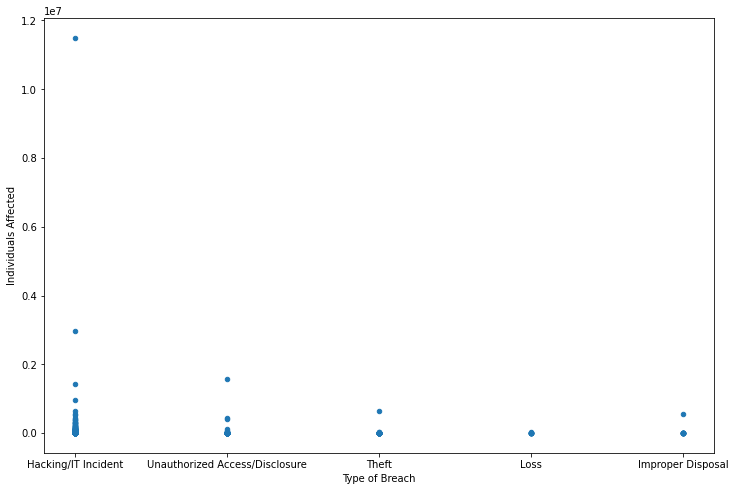

In [71]:
#visualizations Scatter Plot
df_clean[['Type of Breach','Individuals Affected']].plot(
 kind='scatter',
 x='Type of Breach',
 y='Individuals Affected',
 figsize=(12,8)
) 

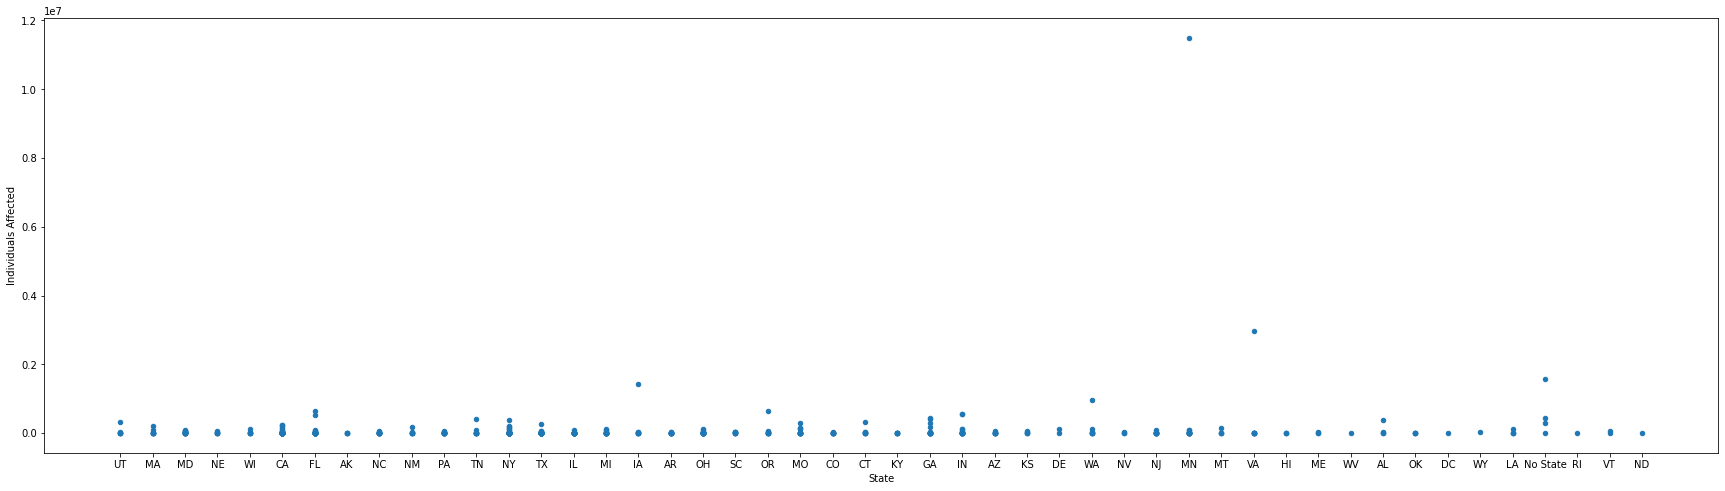

In [74]:
#visualizations Scatter Plot
df_clean[['State','Individuals Affected']].plot(
 kind='scatter',
 x='State',
 y='Individuals Affected',
 figsize=(30 ,8)
) 

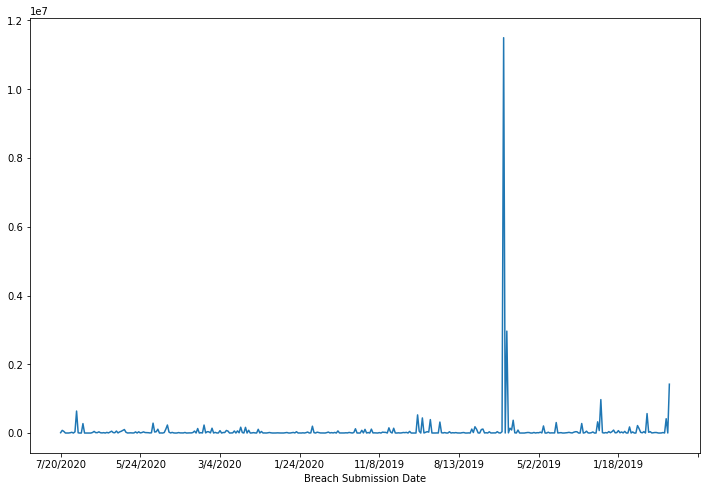

In [80]:
#visualizations Lined Chart
df_clean[
 df_clean['Type of Breach'] == 'Hacking/IT Incident'
].set_index('Breach Submission Date')['Individuals Affected'].plot(
 kind='line',
 figsize=(12,8)
) 